<a href="https://colab.research.google.com/github/Saadman53/Thesis-Human-Activity-Recognition/blob/main/(UTD)_Human_Action_Recognition_using_Sensor_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
#gdrive_path = "drive/My Drive/Dataset/all_data.csv"
gdrive_path = "drive/My Drive/Dataset/UTD MHAD/utd_mhad_sensor_nan.csv"

Mounted at /content/drive


In [2]:
!pip install minepy
!pip install sklearn_relief
!pip install sklearn-genetic
!pip install info_gain
!pip install ax-platform

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.0/497.0 KB 13.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for minepy: filename=minepy-1.2.6-cp38-cp38-linux_x86_64.whl size=232638 sha256=41057e511105def246ad8aa586b243b16257cdbf186c3e4ed48060424114a77d
  Stored in directory: /root/.cache/pip/wheels/38/c1/43/6122536c873081a61af51f929214171d5372f93a29e263a06f
Successfully built minepy
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 KB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 12.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from minepy import MINE
from sklearn.feature_selection import mutual_info_regression
import scipy
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from scipy.special import entr
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import differential_entropy
from scipy.stats import entropy
import scipy.io as sio

from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import DataLoader, TensorDataset
from torch import Tensor
import torch.optim as optim
from ax.plot.contour import plot_contour
from ax.plot.trace import optimization_trace_single_method
from ax.service.managed_loop import optimize
from ax.utils.notebook.plotting import render
from ax.utils.tutorials.cnn_utils import train, evaluate


from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

from genetic_selection import GeneticSelectionCV
from sklearn.tree import DecisionTreeClassifier

from sklearn.feature_selection import mutual_info_regression
from info_gain import info_gain

import random
from sklearn.metrics import confusion_matrix, recall_score, precision_score


import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report


from torch.utils.data import DataLoader, ConcatDataset
# from torchvision import transforms
from sklearn.model_selection  import StratifiedKFold
%matplotlib inline

In [4]:
df = pd.read_csv(gdrive_path)
df.tail()

,mean_a_x,var_a_x,std_a_x,max_a_x,min_a_x,range_a_x,dc_comp_a_x,spec_energy_a_x,spec_entropy_a_x,max_psd_a_x,...,spec_entropy_g_m,max_psd_g_m,min_psd_g_m,min_max_psd_g_m,max_xas_g_m,min_xas_g_m,min_max_xas_g_m,activity,mat_filename,filename
856,-0.657154,0.994531,0.997262,1.054932,-2.762939,3.817871,15754.357130,2.314156e+06,2.116738,0.548857,...,3.045490,0.520517,3.331627e-07,6.400616e-07,0.721468,0.000577,0.0008,9,a9_s7_t4_inertial.mat,a9_s7_t4
857,-0.728613,0.201448,0.448830,0.540283,-1.335938,1.876221,16258.119714,1.544024e+06,2.082137,0.563677,...,1.851234,0.961663,-4.626563e-01,-4.811001e-01,0.980644,NaN,NaN,9,a9_s8_t1_inertial.mat,a9_s8_t1
858,-0.681272,0.230973,0.480597,0.554443,-1.322998,1.877441,14705.528370,1.272443e+06,1.903131,0.672218,...,2.414126,0.849701,-2.576370e-01,-3.032091e-01,0.921792,NaN,NaN,9,a9_s8_t2_inertial.mat,a9_s8_t2
859,-0.566068,0.270379,0.519980,0.583984,-1.385986,1.969970,10266.993537,6.752858e+05,1.856370,0.675501,...,2.779983,0.748548,-2.294571e-01,-3.065361e-01,0.865187,NaN,NaN,9,a9_s8_t3_inertial.mat,a9_s8_t3
860,-0.605501,0.202929,0.450476,0.630859,-1.283936,1.914795,12820.752771,9.444741e+05,1.650082,0.891289,...,2.772472,0.942892,-2.906394e-01,-3.082425e-01,0.971026,NaN,NaN,9,a9_s8_t4_inertial.mat,a9_s8_t4


In [5]:
df.shape

(861, 123)

In [6]:
df['mat_filename'] = [x.replace(" ","") for x in df['mat_filename'] ]

In [7]:
df.drop(['filename'], axis = 1, inplace = True)

In [8]:
df.drop(df.columns[df.isna().any()].tolist(), axis = 1, inplace = True)
# df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [9]:
#df = df.drop(983, inplace = False)
X = df.drop(['activity'], axis = 1)
y = df['activity']-1
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42, stratify = y)
train_files = X_train['mat_filename'].values
test_files = X_test['mat_filename'].values
X_train.drop(['mat_filename'], axis = 1,inplace = True)
X_test.drop(['mat_filename'], axis = 1,inplace = True)

X_train_val, X_val, y_train_val, y_val = train_test_split(X_train, y_train,test_size=0.15, random_state=42, stratify = y_train)

In [10]:
features = X_train.columns

In [12]:
#relief f
from sklearn.metrics.pairwise import pairwise_distances
def reliefF(X, y, **kwargs):
    """
    This function implements the reliefF feature selection
    Input
    -----
    X: {numpy array}, shape (n_samples, n_features)
        input data
    y: {numpy array}, shape (n_samples,)
        input class labels
    kwargs: {dictionary}
        parameters of reliefF:
        k: {int}
            choices for the number of neighbors (default k = 5)
    Output
    ------
    score: {numpy array}, shape (n_features,)
        reliefF score for each feature
    Reference
    ---------
    Robnik-Sikonja, Marko et al. "Theoretical and empirical analysis of relieff and rrelieff." Machine Learning 2003.
    Zhao, Zheng et al. "On Similarity Preserving Feature Selection." TKDE 2013.
    """

    if "k" not in kwargs.keys():
        k = 5
    else:
        k = kwargs["k"]
    n_samples, n_features = X.shape

    # calculate pairwise distances between instances
    distance = pairwise_distances(X, metric='manhattan')

    score = np.zeros(n_features)

    # the number of sampled instances is equal to the number of total instances
    for idx in range(n_samples):
        near_hit = []
        near_miss = dict()

        self_fea = X[idx, :]
        c = np.unique(y).tolist()

        stop_dict = dict()
        for label in c:
            stop_dict[label] = 0
        del c[c.index(y[idx])]

        p_dict = dict()
        p_label_idx = float(len(y[y == y[idx]]))/float(n_samples)

        for label in c:
            p_label_c = float(len(y[y == label]))/float(n_samples)
            p_dict[label] = p_label_c/(1-p_label_idx)
            near_miss[label] = []

        distance_sort = []
        distance[idx, idx] = np.max(distance[idx, :])

        for i in range(n_samples):
            distance_sort.append([distance[idx, i], int(i), y[i]])
        distance_sort.sort(key=lambda x: x[0])

        for i in range(n_samples):
            # find k nearest hit points
            if distance_sort[i][2] == y[idx]:
                if len(near_hit) < k:
                    near_hit.append(distance_sort[i][1])
                elif len(near_hit) == k:
                    stop_dict[y[idx]] = 1
            else:
                # find k nearest miss points for each label
                if len(near_miss[distance_sort[i][2]]) < k:
                    near_miss[distance_sort[i][2]].append(distance_sort[i][1])
                else:
                    if len(near_miss[distance_sort[i][2]]) == k:
                        stop_dict[distance_sort[i][2]] = 1
            stop = True
            for (key, value) in stop_dict.items():
                    if value != 1:
                        stop = False
            if stop:
                break

        # update reliefF score
        near_hit_term = np.zeros(n_features)
        for ele in near_hit:
            near_hit_term = np.array(abs(self_fea-X[ele, :]))+np.array(near_hit_term)

        near_miss_term = dict()
        for (label, miss_list) in near_miss.items():
            near_miss_term[label] = np.zeros(n_features)
            for ele in miss_list:
                near_miss_term[label] = np.array(abs(self_fea-X[ele, :]))+np.array(near_miss_term[label])
            score += near_miss_term[label]/(k*p_dict[label])
        score -= near_hit_term/k
    return score


def feature_ranking(score):
    """
    Rank features in descending order according to reliefF score, the higher the reliefF score, the more important the
    feature is
    """
    idx = np.argsort(score, 0)
    return idx[::-1]
def selected_features(X, score):
  ranked_features = feature_ranking(score)
  sel_feat = []
  for i in range(X.shape[1]):
    if(ranked_features[i]>0):
      sel_feat.append(ranked_features[i])
    else:
      break
  return X.columns[np.array(sel_feat)]


In [19]:
##symmetrical uncertainty
def SU(df, X,Y):
  if(Y=='activity'):
    IG = mutual_info_classif(np.transpose(np.array([df[X]])), df[Y]).item()
    H_Y = entropy(df[Y])
  else:
    IG = mutual_info_regression(np.transpose(np.array([df[X]])), df[Y]).item()
    H_Y = differential_entropy(df[Y])
  H_X = differential_entropy(df[X])
  su = ((2.0*IG)/(H_X+H_Y))
  return su
 
def MI(df, X,Y):
  if(Y=='activity'):
    MI = mutual_info_classif(np.transpose(np.array([df[X]])), df[Y]).item()
  else:
    MI = mutual_info_regression(np.transpose(np.array([df[X]])), df[Y]).item()
  return MI

def MIC_feature_selection(X_train, y_train):
  scores = {}
  mine = MINE(alpha=0.6, c=15, est="mic_approx")
  for i in range(X_train.shape[1]):
    mic_score = mine.compute_score(X_train.iloc[:,i], y_train).mic()
    scores.append(mic_score)
    res = pd.Series(np.array(scores),index = features).sort_values(ascending=False)
  return res
# res[res>0.60].index.values

def SU_feature_selection(X_train, y_train):
  df_train = df[X_train.columns].iloc[X_train.index].copy()
  scores = []
  #print("SU:\nCol\tScore")
  for col in df_train.columns:
    if col!='activity':
      #print(col+":")
      score = SU(df, col, 'activity')
      scores.append(score)
      #print(score)
  ser = pd.Series(np.array(scores),index = features).sort_values(ascending=False)
  return ser[ser>0.0].index.values

#Fast Correlation Based Filter
def FCBF(df, features, C):
  thresh = 0.000001
  N = len(features)
  S_list = {}
  for i in range(N):
    val = SU(df, features[i], C)
    if(val> thresh):
      S_list[features[i]] = val
  S_list = pd.Series(S_list).sort_values(ascending=False)
  no_features = S_list.shape[0]
  a_list = np.ones(no_features)
  for i in range(no_features):
    if(a_list[i]==1):
      Fp = S_list.index[i]
      for j in range(i+1,no_features):
        if(a_list[j]==1):
          Fq = S_list.index[j]
          if(SU(df, Fp,Fq) >= S_list[j]):
            #print(f"{j} has been eleminated while in {i}")
            a_list[j]=0
  idx = np.where(a_list==1)[0]
  return S_list.index[idx]

def random_forest_feature_selection(X_train, y_train):
  sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
  sel.fit(X_train, y_train)
  sel.get_support()
  selected_features_rf= X_train.columns[(sel.get_support())].values
  return selected_features_rf

def reliefF_feature_selection(X_train, y_train):
  score = reliefF(X_train.to_numpy(),y_train.to_numpy())
  selected_features_relief = selected_features(X_train,score).values
  return selected_features_relief

def genetic_feature_selection(X_train, y_train):
  estimator = DecisionTreeClassifier()
  model = GeneticSelectionCV(
      estimator, cv=5, verbose=0,
      scoring="accuracy", max_features=min(100,X_train.shape[1]),
      n_population=100, crossover_proba=0.5,
      mutation_proba=0.2, n_generations=50,
      crossover_independent_proba=0.5,
      mutation_independent_proba=0.04,
      tournament_size=3, n_gen_no_change=10,
      caching=True, n_jobs=-1)
  model = model.fit(X_train,y_train)
  selected_features_genetic = X_train.columns[model._get_support_mask()].values
  return selected_features_genetic

def mutual_information_feature_selection(X_train, y_train):
  mi_scores = mutual_info_regression(X_train, y_train, discrete_features=False)
  mi_scores = pd.Series(mi_scores, name="MI Scores", index=X_train.columns)
  mi_scores = mi_scores.sort_values(ascending=False)
  selected_features_info_gain = mi_scores[mi_scores>0.5].index.values
  return selected_features_info_gain

def information_gain_feature_selection(X_train, y_train):
  scores = []
  for i in range(X_train.shape[1]):
    score = info_gain.info_gain(X_train.iloc[:,i], y_train )
    scores.append(score)
    #print(X_train.columns[i],score) [res>0.60].index.values
  res = pd.Series(np.array(scores),index = features).sort_values(ascending=False)
  return res[res>3.0].index.values
def gain_ratio_feature_selection(X_train, y_train):
  gain_ratio = []
  #print("Gain Ratio:\nCol\tScore")
  for i in range(X_train.shape[1]):
    score = info_gain.info_gain_ratio(X_train.iloc[:,i], y_train )
    gain_ratio.append(score)
    #print(X_train.columns[i],score)
  res = pd.Series(np.array(gain_ratio),index = features).sort_values(ascending=False)
  return res[res>0.60].index.values

def chi2_feature_selection(X_train,y_train):
  scaler = MinMaxScaler()
  X_train1 = scaler.fit_transform(X_train)
  from sklearn.feature_selection import chi2
  chi_scores = chi2(X_train1,y_train)
  p_values = pd.Series(chi_scores[1],index = X_train.columns)
  p_values.sort_values(ascending = False , inplace = True)
  selected_features_chi = p_values[p_values>0.5].index.values
  return selected_features_chi

In [20]:
def ECFS(df,X_train,y_train):
  selected_feature_list = [random_forest_feature_selection(X_train,y_train),
                           reliefF_feature_selection(X_train,y_train), 
                           genetic_feature_selection(X_train,y_train), 
                           mutual_information_feature_selection(X_train,y_train), 
                           chi2_feature_selection(X_train,y_train)]
  s = set()
  df_train = df.iloc[X_train.index]
  for i in range(5):
    for j in range(len(selected_feature_list[i])):
      s.add(selected_feature_list[i][j])
  final_list = []
  ensemble_list = []
  for feat in s:
    cnt = 0
    for j in range(5):
      if(feat in selected_feature_list[j]):
        cnt+=1
    if(cnt>=4):
      final_list.append(feat)
    else:
      ensemble_list.append(feat)
  sel = FCBF(df_train, ensemble_list, 'activity')
  final_list.extend(sel.values.tolist())
  return final_list

In [21]:
selected_feat_ecfs = ECFS(df, X_train, y_train)
len(selected_feat_ecfs)

66

In [22]:
sensor_features = {'train_filename':train_files, 'test_filename': test_files, 'X_train': X_train[selected_feat_ecfs].to_numpy(), 'X_test': X_test[selected_feat_ecfs].to_numpy()}
sio.savemat("drive/My Drive/Dataset/utd_sensor_features_acc_gyro.mat",sensor_features)

In [23]:
def EFS_MI(df, X_train, y_train):
  selected_feature_list = [gain_ratio_feature_selection(X_train, y_train),
                           reliefF_feature_selection(X_train,y_train), 
                           SU_feature_selection(X_train, y_train), 
                           information_gain_feature_selection(X_train, y_train), 
                           chi2_feature_selection(X_train,y_train)]
  s = set()
  df_train = df.iloc[X_train.index]
  for i in range(5):
    for j in range(len(selected_feature_list[i])):
      s.add(selected_feature_list[i][j])
  optimal_list = []
  ensemble_list = []
  for feat in s:
    cnt = 0
    for j in range(5):
      if(feat in selected_feature_list[j]):
        cnt+=1
    if(cnt==5):
      optimal_list.append(feat)
    else:
      ensemble_list.append(feat)
  f_class_mi = []
  for feature in ensemble_list:
    score = MI(df_train, feature, 'activity')
    f_class_mi.append(score)
  f_class_mi = pd.Series(np.array(f_class_mi),index = ensemble_list).sort_values(ascending=False)
  ensemble_list= f_class_mi.index.values
  #print(len(optimal_list))
  #print(len(ensemble_list))
  for feature in ensemble_list:
    scores = []
    for opt_feature in optimal_list:
      scores.append(MI(df_train,feature,opt_feature))
    if (max(scores)<0.75):
      optimal_list.append(feature)
  return optimal_list


In [24]:
class DNN(nn.Module):
    def __init__(self,input_size,output_size):
        super(DNN,self).__init__()
        self.hidden1 = nn.Linear(input_size,128)
        self.hidden2 = nn.Linear(128,64)
        self.hidden3 = nn.Linear(64,32)
        self.output = nn.Linear(32,output_size)
        self.softmax = F.softmax
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.2)
        self.batchnorm1 = nn.BatchNorm1d(128)
        self.batchnorm2 = nn.BatchNorm1d(64)
        self.batchnorm3 = nn.BatchNorm1d(32)
    
    def forward(self,x):
        out = self.hidden1(x)
        out = self.batchnorm1(out)
        out = self.relu(out)
        
        out = self.hidden2(out)
        out = self.batchnorm2(out)
        out = self.relu(out)
        out = self.dropout(out)

        out = self.hidden3(out)
        out = self.batchnorm3(out)
        out = self.relu(out)
        out = self.dropout(out)

        out = self.output(out)
        return out

In [25]:
def train_test_loader(X_train, X_test, y_train, y_test, selected_features):
  scaler = MinMaxScaler()
  train_X = X_train[selected_features].copy()
  test_X = X_test[selected_features].copy()
  train_X = scaler.fit_transform(train_X)
  test_X = scaler.transform(test_X)
  train_dataset = TensorDataset(Tensor(train_X), Tensor(y_train.values))
  test_dataset = TensorDataset(Tensor(test_X), Tensor(y_test.values))
  test_loader = DataLoader(test_dataset, batch_size= 64)
  return train_dataset, test_loader

train_set, test_loader = train_test_loader(X_train, X_test, y_train, y_test, selected_feat_ecfs)

In [26]:
def net_train(net, train_loader, parameters):
  criterion = nn.CrossEntropyLoss(reduction = "sum")
  optimizer = optim.SGD(net.parameters(), # or any optimizer you prefer 
                        lr=parameters.get("lr", 0.001), # 0.001 is used if no lr is specified
                        momentum=parameters.get("momentum", 0.9)
  )

  scheduler = optim.lr_scheduler.StepLR(
      optimizer,
      step_size=int(parameters.get("step_size", 30)),
      gamma=1.0,  # default is no learning rate decay
  )

  num_epochs = parameters.get("max_epoch", 3) # Play around with epoch number
  # Train Network
  for _ in range(num_epochs):
    for inputs, labels in train_loader:
      # zero the parameter gradients
      optimizer.zero_grad()
      # forward + backward + optimize
      outputs = net(inputs)
      loss = criterion(outputs, labels.long())
      loss.backward()
      optimizer.step()
      scheduler.step()
  return net

In [36]:
def train_evaluate(parameterization):
    # constructing a new training data loader allows us to tune the batch size
    train_loader = torch.utils.data.DataLoader(train_set,
                                batch_size=parameterization.get("batchsize", 32),
                                shuffle=True,
                                num_workers=0,
                                pin_memory=True,drop_last=True)
    
    # Get neural net
    untrained_net = DNN(inpsize,outsize)
    # train
    trained_net = net_train(net=untrained_net, train_loader=train_loader, 
                            parameters=parameterization)
    # return the accuracy of the model as it was trained in this run
    return evaluate(
        net=trained_net,
        data_loader=test_loader,
        dtype = torch.float,
        device = "cpu"
    )

In [59]:
train_set, test_loader = train_test_loader(X_train_val, X_val, y_train_val, y_val, selected_feat_ecfs)
inpsize = len(selected_feat_ecfs)
outsize = np.unique(y_train_val).shape[0]
dtype = torch.float
best_parameters, values, experiment, model = optimize(
    parameters=[
        {"name": "lr", "type": "range", "bounds": [1e-6, 0.4], "log_scale": True},
        {"name": "batchsize", "type": "range", "bounds": [16, 128]},
        {"name": "momentum", "type": "range", "bounds": [0.5, 0.9]},    
        {"name": "max_epoch", "type": "range", "bounds": [50, 100]},
        {"name": "stepsize", "type": "range", "bounds": [20, 30]},     
    ],
  
    evaluation_function=train_evaluate,
    objective_name='accuracy',
)

print(best_parameters)
means, covariances = values
print(means)
print(covariances)

[INFO 02-04 04:57:45] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter lr. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 02-04 04:57:45] ax.service.utils.instantiation: Inferred value type of ParameterType.INT for parameter batchsize. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 02-04 04:57:45] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter momentum. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 02-04 04:57:45] ax.service.utils.instantiation: Inferred value type of ParameterType.INT for parameter max_epoch. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter di

{'lr': 0.00044239647145104233, 'batchsize': 102, 'momentum': 0.7314925160281245, 'max_epoch': 98, 'stepsize': 21}
{'accuracy': 0.9116544031415226}
{'accuracy': {'accuracy': 0.00010659056487354592}}


In [60]:
best_parameters

{'lr': 0.00044239647145104233,
 'batchsize': 102,
 'momentum': 0.7314925160281245,
 'max_epoch': 98,
 'stepsize': 21}

In [61]:
best_objectives = np.array([[trial.objective_mean*100 for trial in experiment.trials.values()]])

best_objective_plot = optimization_trace_single_method(
    y=np.maximum.accumulate(best_objectives, axis=1),
    title="Model performance vs. # of iterations",
    ylabel="Classification Accuracy, %",
)
render(best_objective_plot)

render(plot_contour(model=model, param_x='batchsize', param_y='lr', metric_name='accuracy'))

In [62]:
data = experiment.fetch_data()
dff = data.df
best_arm_name = dff.arm_name[dff['mean'] == dff['mean'].max()].values[0]
best_arm = experiment.arms_by_name[best_arm_name]
best_arm

Arm(name='18_0', parameters={'lr': 0.00044239647145104233, 'batchsize': 102, 'momentum': 0.7314925160281245, 'max_epoch': 98, 'stepsize': 21})

In [63]:
def optim_scheduler(net,parameters):
  optimizer = optim.SGD(net.parameters(), # or any optimizer you prefer 
                        lr=parameters.get("lr", 0.001), # 0.001 is used if no lr is specified
                        momentum=parameters.get("momentum", 0.9)
  )
  scheduler = optim.lr_scheduler.StepLR(
      optimizer,
      step_size=int(parameters.get("step_size", 30)),
      gamma=1.0,  # default is no learning rate decay
  )
  return optimizer, scheduler
def extract_batch(X,y,batch_size,step,no_of_samples):
  l = (step-1)*batch_size
  return X[l:(l+batch_size)],y[l:min(no_of_samples,l+batch_size)]

def model_training_evaluation(X_train, X_test, y_train, y_test, selected_feat):
  train_X = X_train[selected_feat]
  test_X = X_test[selected_feat]
  scaler = MinMaxScaler()
  train_X = scaler.fit_transform(train_X)
  test_X = scaler.transform(test_X)
  train_X = torch.from_numpy(train_X.astype(np.float32))
  test_X = torch.from_numpy(test_X.astype(np.float32))
  train_y =  torch.tensor(y_train.values.astype(np.float32))
  test_y =  torch.tensor(y_test.values.astype(np.float32))
  input_size = train_X.shape[1]
  output_size = torch.unique(train_y).shape[0]
  learning_rate = best_parameters['lr']
  num_epochs = best_parameters['max_epoch']
  n_samples = train_X.shape[0]
  criterion = nn.CrossEntropyLoss(reduction='sum')
  skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
  net = DNN(input_size, output_size)
  optimizer, scheduler = optim_scheduler(net,best_parameters)
  figure, ax = plt.subplots(5,figsize=(10,10))
  figure.tight_layout(pad=5.0)
  cnt = 1
  best_loss = 100000
  best_model = None
  best_epoch = None
  for train_index, val_index in skf.split(X_train, y_train):
    train_X_fold = train_X[train_index]
    train_y_fold = train_y[train_index]
    val_x_fold = train_X[val_index]
    val_y_fold = train_y[val_index]
    n_samples = train_X_fold.shape[0]
    batch_size = best_parameters['batchsize']
    train_loss = []
    val_loss = []
    print(f"Training for fold {cnt}")
    for epoch in range(num_epochs):
      step = 1
      while(batch_size*step<=n_samples):
        x,y =  extract_batch(train_X_fold,train_y_fold, batch_size, step, n_samples)
        # Forward Propagation
        y_predicted = net(x)
        loss = criterion(y_predicted,  torch.tensor(y, dtype=torch.long))
        # Backward propagation and update
        loss.backward()
        optimizer.step()
        scheduler.step()
        # Performing zero grad before new step
        optimizer.zero_grad()
        step = step+1
      t_loss = criterion( net(train_X_fold),  torch.tensor(train_y_fold, dtype=torch.long)).item()/train_X_fold.shape[0]
      v_loss = criterion( net(val_x_fold),  torch.tensor(val_y_fold, dtype=torch.long)).item()/val_x_fold.shape[0]
      train_loss.append(t_loss) 
      val_loss.append(v_loss)
      if(v_loss<best_loss):
        best_loss = v_loss
        best_model = net
        best_epoch = epoch
      print(epoch*100/num_epochs)
    m = "Fold "+str(cnt)
    ax[cnt-1].title.set_text(m)
    ax[cnt-1].set_ylabel("Total Loss")
    ax[cnt-1].set_xlabel("No of Epochs")
    ax[cnt-1].plot(range(num_epochs),train_loss, label = "train loss")
    ax[cnt-1].plot(range(num_epochs),val_loss, label = "validation loss")
    cnt+=1
  y_pred = best_model(test_X)
  return best_model, y_pred


Training for fold 1
0.0
1.0204081632653061
2.0408163265306123
3.061224489795918
4.081632653061225
5.1020408163265305
6.122448979591836
7.142857142857143
8.16326530612245
9.183673469387756
10.204081632653061
11.224489795918368
12.244897959183673
13.26530612244898
14.285714285714286
15.306122448979592
16.3265306122449
17.346938775510203
18.367346938775512
19.387755102040817
20.408163265306122
21.428571428571427
22.448979591836736
23.46938775510204
24.489795918367346
25.510204081632654
26.53061224489796
27.551020408163264
28.571428571428573
29.591836734693878
30.612244897959183
31.632653061224488
32.6530612244898
33.673469387755105
34.69387755102041
35.714285714285715
36.734693877551024
37.755102040816325
38.775510204081634
39.795918367346935
40.816326530612244
41.83673469387755
42.857142857142854
43.87755102040816
44.89795918367347
45.91836734693877
46.93877551020408
47.95918367346939
48.97959183673469
50.0
51.02040816326531
52.04081632653061
53.06122448979592
54.08163265306123
55.102040

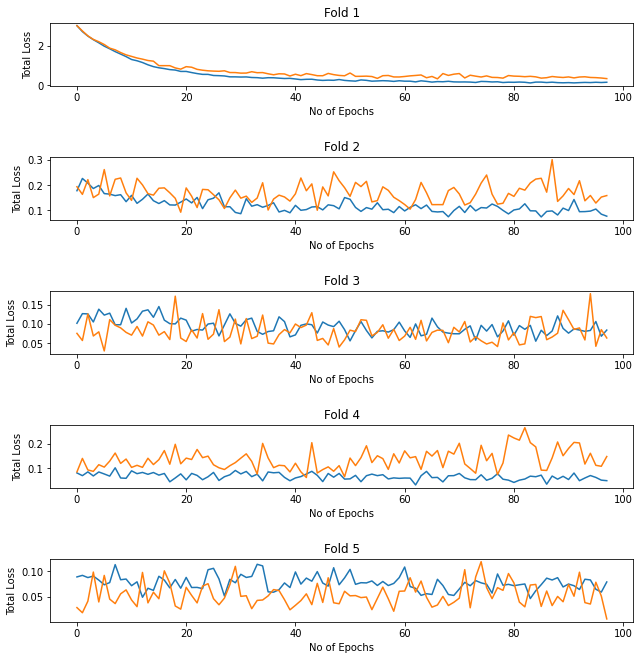

In [64]:
start = time.time()
best_model, y_pred = model_training_evaluation(X_train, X_test, y_train, y_test, selected_feat_ecfs)
end = time.time()
training_time = end - start

In [65]:
print(f"Time took to train {training_time} seconds")

Time took to train 6.955112457275391 seconds


In [66]:
def cf_matrix(y_pred, test_y):
  y_pred_softmax = torch.log_softmax(y_pred, dim = 1)
  _, y_pred = torch.max(y_pred_softmax, dim = 1)
  y_pred = y_pred.detach().numpy().ravel()
  correct_pred = (y_pred == test_y).astype(np.float)
  acc = correct_pred.sum()*100.0 / y_pred.shape[0]
  cm = confusion_matrix(test_y.ravel(), y_pred)
  recall = np.mean(recall_score(test_y.ravel(), y_pred, average=None))*100.0
  precision = np.mean(precision_score(test_y.ravel(), y_pred, average=None))*100.0
  f1 = 2*((precision*recall*1.0)/(precision+recall))
  f,ax=plt.subplots(figsize=(20,10))
  sns.heatmap(cm,annot=True,fmt='.0f', cmap="Blues")
  print(f"Accuracy: {acc:.2f}%")
  print(f"Precision: {precision:.2f}%")
  print(f"Recall: {recall:.2f}%")
  print(f"F1 score: {f1:.2f}%")
  plt.ylabel('Actual Values')
  plt.xlabel('Predicted Values')
  plt.show()
  return cm,acc, recall, precision, f1


Accuracy: 93.44%
Precision: 94.05%
Recall: 93.42%
F1 score: 93.73%


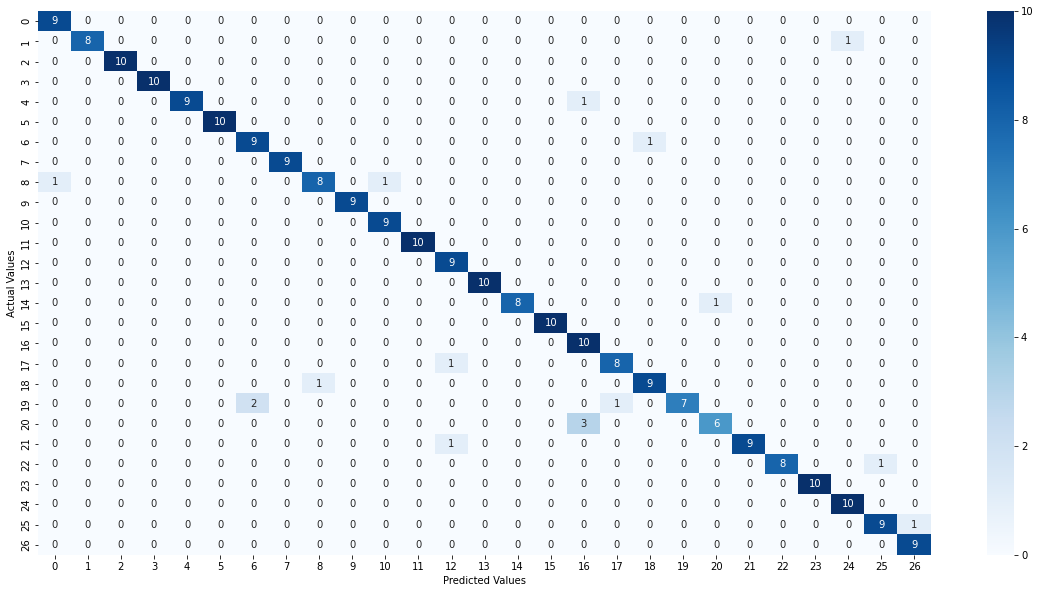

In [67]:
cm,acc, recall, precision,f1 = cf_matrix(y_pred, y_test)

In [68]:
pred_dict = {"preds":y_pred.detach().numpy(), 'y_test':y_test}
sio.savemat("drive/My Drive/Dataset/utd_sensor_predictions(optimized).mat", pred_dict)

In [69]:
selected_feat_efs_mi = EFS_MI(df, X_train, y_train)
len(selected_feat_efs_mi)

55

In [71]:
train_set, test_loader = train_test_loader(X_train_val, X_val, y_train_val, y_val, selected_feat_efs_mi)
inpsize = len(selected_feat_efs_mi)

dtype = torch.float
best_parameters, values, experiment, model = optimize(
    parameters=[
        {"name": "lr", "type": "range", "bounds": [1e-6, 0.4], "log_scale": True},
        {"name": "batchsize", "type": "range", "bounds": [16, 128]},
        {"name": "momentum", "type": "range", "bounds": [0.5, 0.9]},    
        {"name": "max_epoch", "type": "range", "bounds": [50, 100]},
        {"name": "stepsize", "type": "range", "bounds": [20, 30]},     
    ],
  
    evaluation_function=train_evaluate,
    objective_name='accuracy',
)


print(best_parameters)
means, covariances = values
print(means)
print(covariances)

[INFO 02-04 05:02:49] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter lr. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 02-04 05:02:49] ax.service.utils.instantiation: Inferred value type of ParameterType.INT for parameter batchsize. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 02-04 05:02:49] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter momentum. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 02-04 05:02:49] ax.service.utils.instantiation: Inferred value type of ParameterType.INT for parameter max_epoch. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter di

{'lr': 0.0012854209633373036, 'batchsize': 42, 'momentum': 0.7573278386284648, 'max_epoch': 64, 'stepsize': 27}
{'accuracy': 0.890182768582084}
{'accuracy': {'accuracy': 2.228608318715813e-05}}


In [72]:
best_parameters

{'lr': 0.0012854209633373036,
 'batchsize': 42,
 'momentum': 0.7573278386284648,
 'max_epoch': 64,
 'stepsize': 27}

In [73]:
best_objectives = np.array([[trial.objective_mean*100 for trial in experiment.trials.values()]])

best_objective_plot = optimization_trace_single_method(
    y=np.maximum.accumulate(best_objectives, axis=1),
    title="Model performance vs. # of iterations",
    ylabel="Classification Accuracy, %",
)
render(best_objective_plot)

render(plot_contour(model=model, param_x='batchsize', param_y='lr', metric_name='accuracy'))

Training for fold 1
0.0
1.5625
3.125
4.6875
6.25
7.8125
9.375
10.9375
12.5
14.0625
15.625
17.1875
18.75
20.3125
21.875
23.4375
25.0
26.5625
28.125
29.6875
31.25
32.8125
34.375
35.9375
37.5
39.0625
40.625
42.1875
43.75
45.3125
46.875
48.4375
50.0
51.5625
53.125
54.6875
56.25
57.8125
59.375
60.9375
62.5
64.0625
65.625
67.1875
68.75
70.3125
71.875
73.4375
75.0
76.5625
78.125
79.6875
81.25
82.8125
84.375
85.9375
87.5
89.0625
90.625
92.1875
93.75
95.3125
96.875
98.4375
Training for fold 2
0.0
1.5625
3.125
4.6875
6.25
7.8125
9.375
10.9375
12.5
14.0625
15.625
17.1875
18.75
20.3125
21.875
23.4375
25.0
26.5625
28.125
29.6875
31.25
32.8125
34.375
35.9375
37.5
39.0625
40.625
42.1875
43.75
45.3125
46.875
48.4375
50.0
51.5625
53.125
54.6875
56.25
57.8125
59.375
60.9375
62.5
64.0625
65.625
67.1875
68.75
70.3125
71.875
73.4375
75.0
76.5625
78.125
79.6875
81.25
82.8125
84.375
85.9375
87.5
89.0625
90.625
92.1875
93.75
95.3125
96.875
98.4375
Training for fold 3
0.0
1.5625
3.125
4.6875
6.25
7.8125
9.375


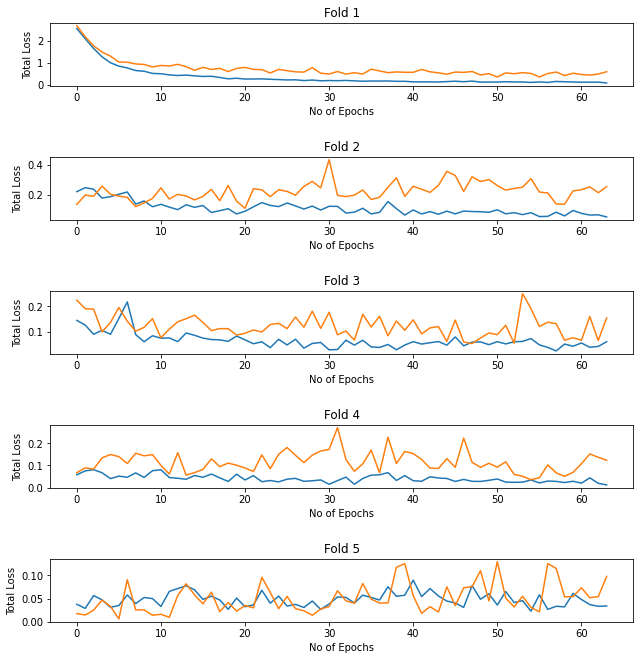

In [74]:
start = time.time()
best_model, y_pred = model_training_evaluation(X_train, X_test, y_train, y_test, selected_feat_efs_mi)
end = time.time()
training_time = end - start

In [75]:
print(f"Time took to train {training_time} seconds")

Time took to train 6.603800058364868 seconds


Accuracy: 90.35%
Precision: 91.09%
Recall: 90.33%
F1 score: 90.71%


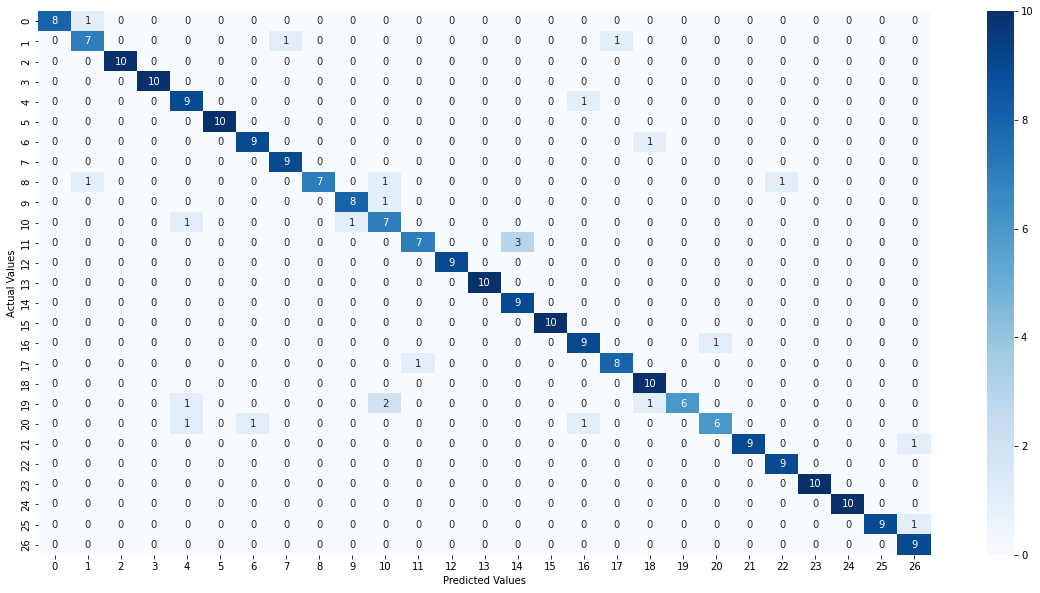

In [76]:
cm,acc, recall, precision,f1 = cf_matrix(y_pred, y_test)

In [77]:
pred_dict = {"preds":y_pred.detach().numpy(), 'y_test':y_test}
sio.savemat("drive/My Drive/Dataset/utd_sensor_predictions(optimized_efs_mi).mat", pred_dict)

In [78]:
feature_dict = {"ecfs": np.array(selected_feat_ecfs), 'efs-mi': np.array(selected_feat_efs_mi)}
sio.savemat("drive/My Drive/Dataset/utd_feature_list.mat", feature_dict)